# The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
## The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



* Attribute Information:

* The explanations of sensor measurements and their brief statistics are given below.

+ Variable (Abbr.) Unit Min Max Mean
+ Ambient temperature (AT) C â€“6.23 37.10 17.71
+ Ambient pressure (AP) mbar 985.85 1036.56 1013.07
+ Ambient humidity (AH) (%) 24.08 100.20 77.87
+ Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
+ Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
+ Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
+ Turbine after temperature (TAT) C 511.04 550.61 546.16
+ Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
+ Turbine energy yield (TEY) MWH 100.02 179.50 133.51
+ Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
+ Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

# Workflow
1. Importing Libraries
2. Load the dataset
3. EDA
4. Hyperparameter tuning
5. Build the model
6. Check the model performance
7. Conclusion

# 1. Importing libraries

In [25]:
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Load tha dataset

In [3]:
df = pd.read_csv('/content/drive/My Drive/Ass_16/gas_turbines.csv')

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2154223133836365138, *['AT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2154223133836365138, *['AP'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2154223133836365138, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2154223133836365138, *['AFDP'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2154223133836365138, *['AT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2154223133836365138, *['AP'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2154223133836365138, *['AH'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2154223133836365138, *['AFDP'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_2154223133836365138, *[[['AT', 'AP'], ['AP', 'AH'], ['AH', 'AFDP'], ['AFDP', 'GTEP']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2154223133836365138, *['AP', 'AT', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2154223133836365138, *['AP', 'AH', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2154223133836365138, *['AP', 'AFDP', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2154223133836365138 = autoviz.get_registered_df('df_2154223133836365138')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2154223133836365138, *['AP', 'GTEP', None], **{})
chart

# 3. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [7]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
col = df.columns
col

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [10]:
sns.set_style('darkgrid')

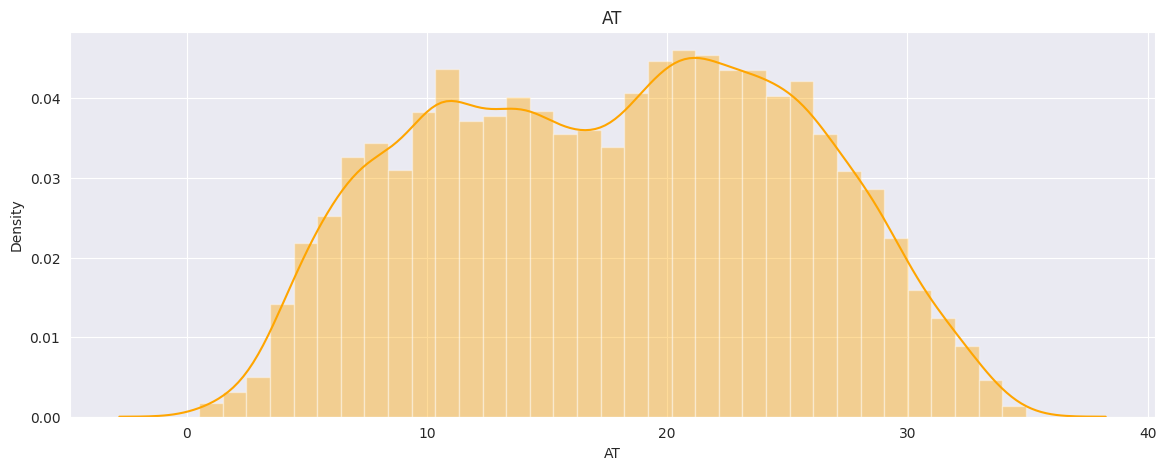

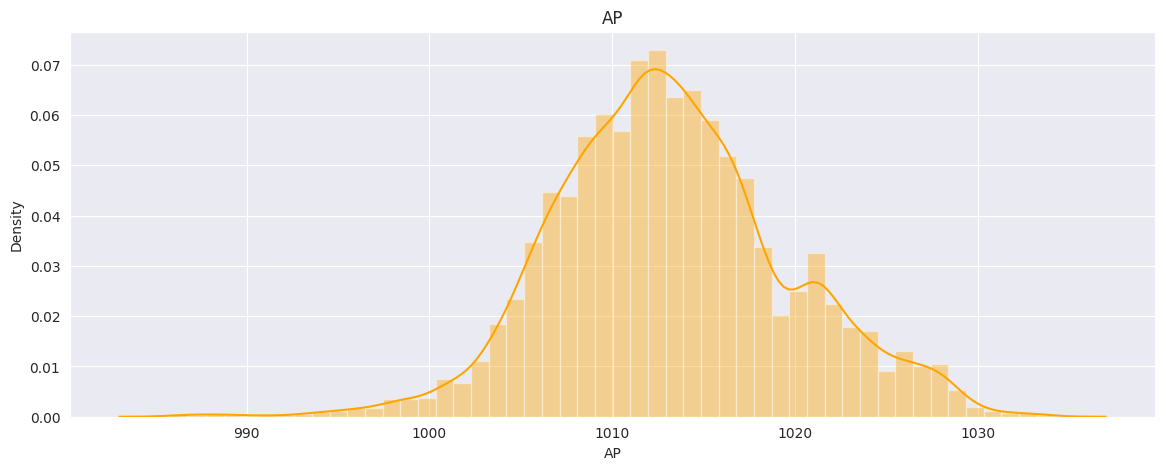

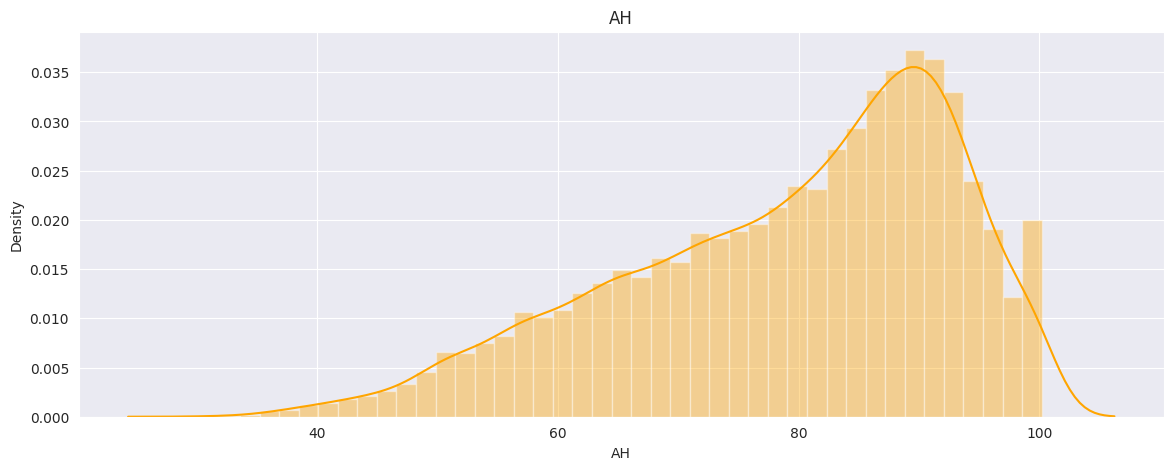

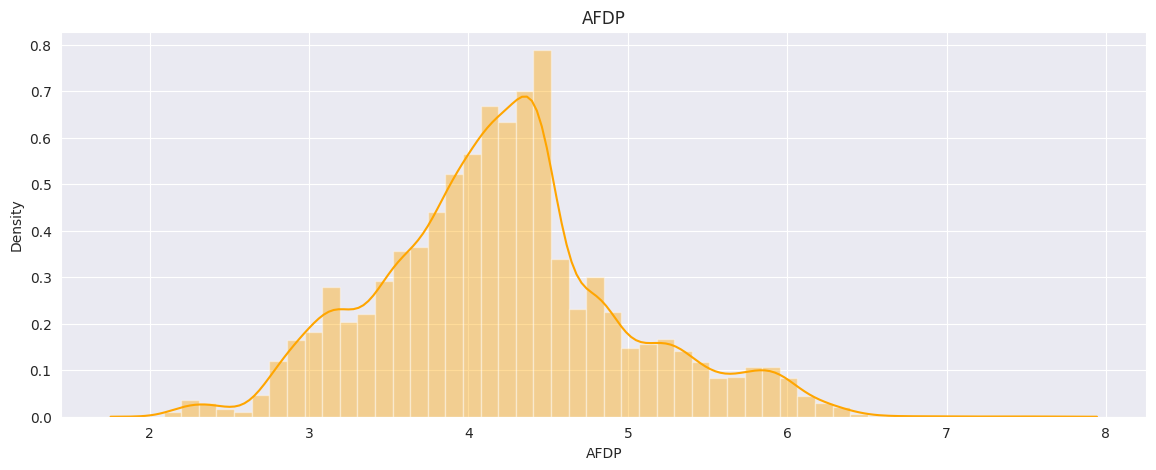

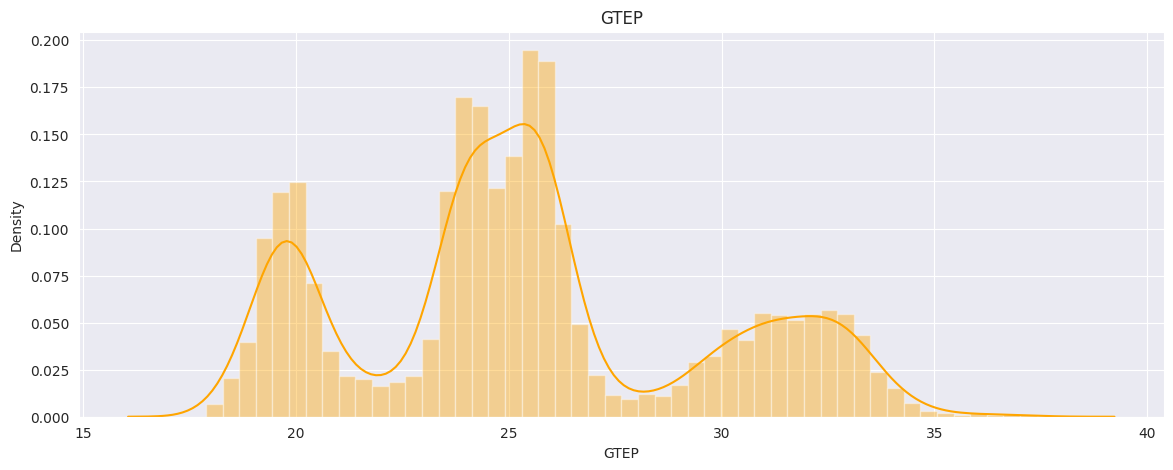

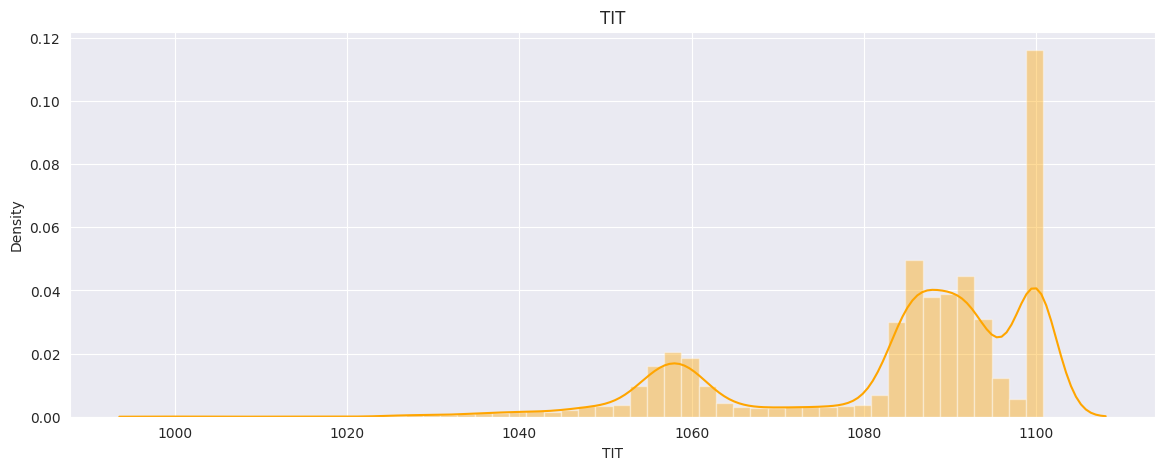

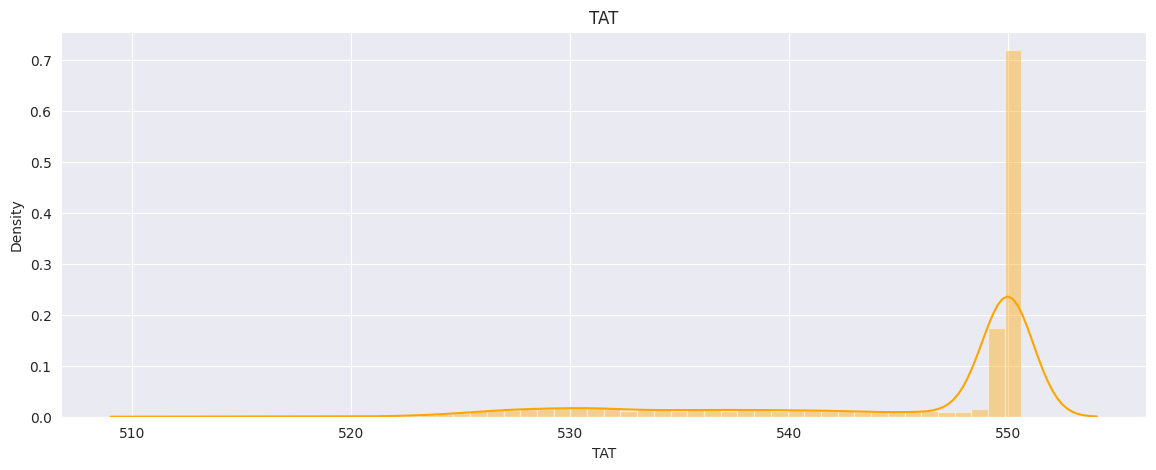

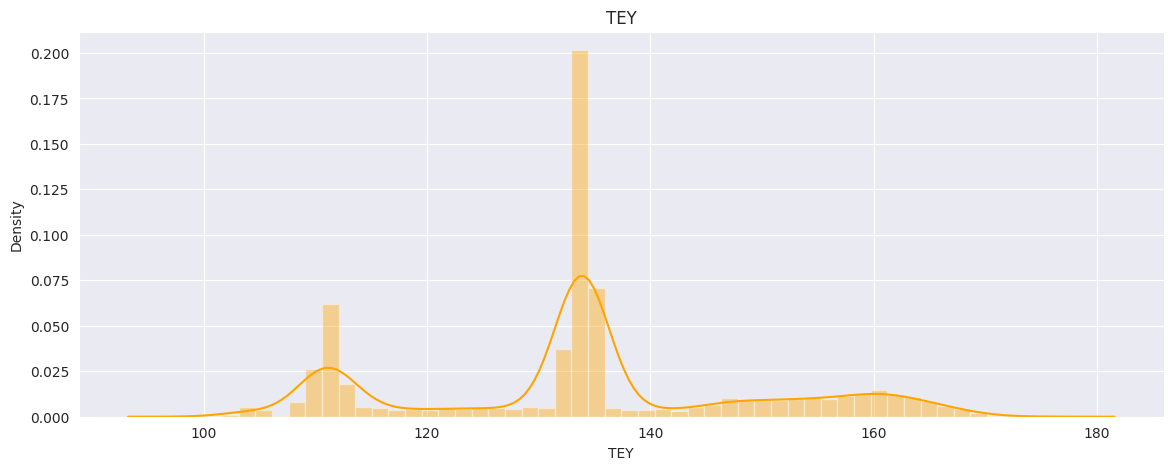

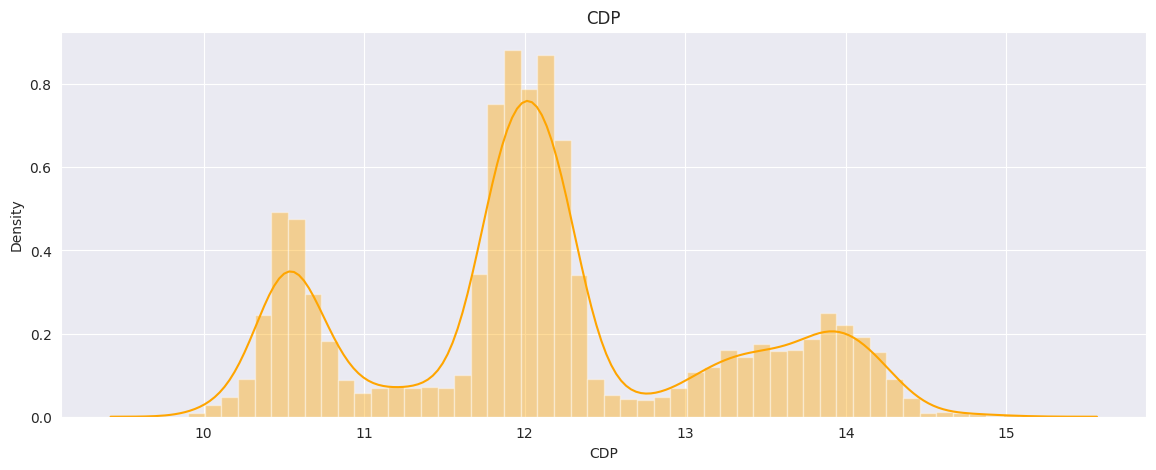

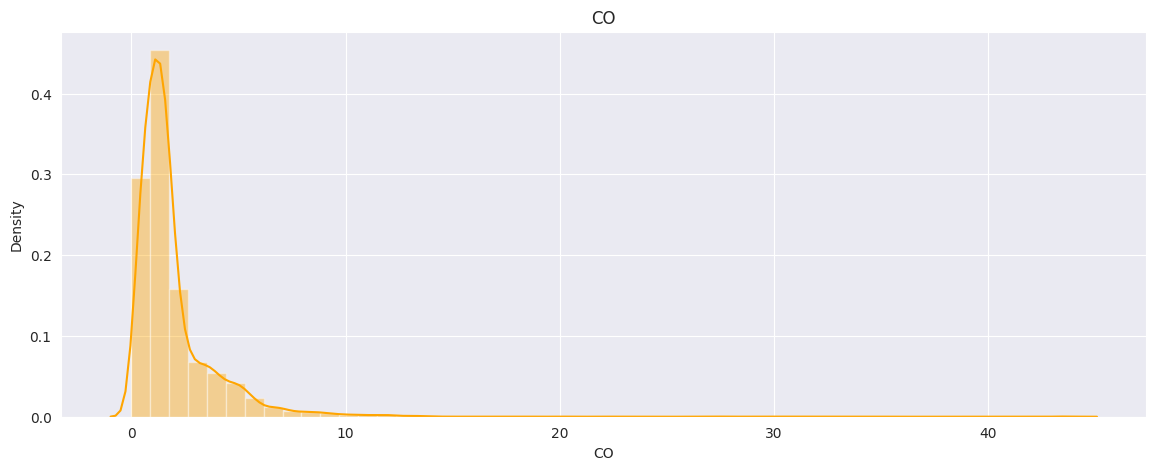

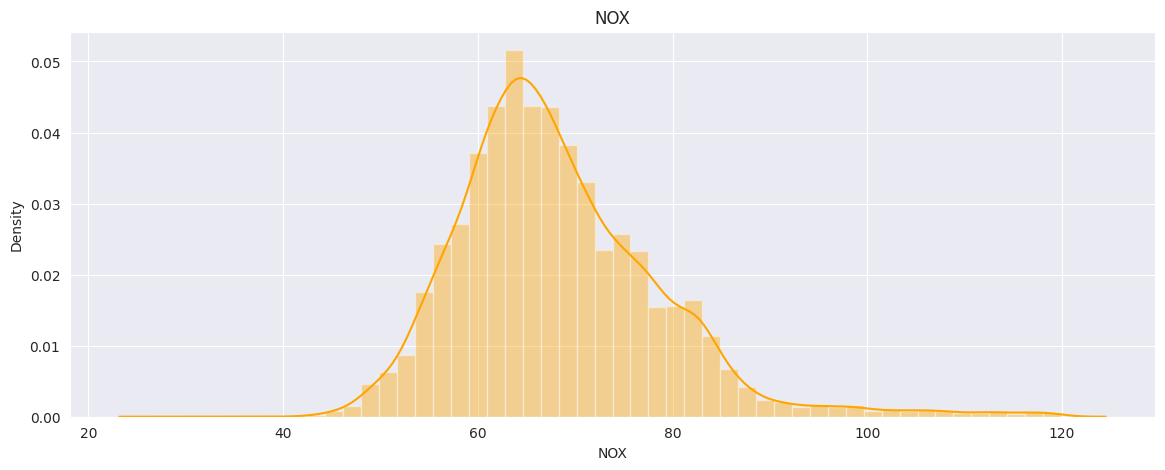

In [11]:
for i in col:
  plt.figure(figsize=(14,5))
  sns.distplot(df[i], color='orange')
  plt.title(i)
  plt.show()

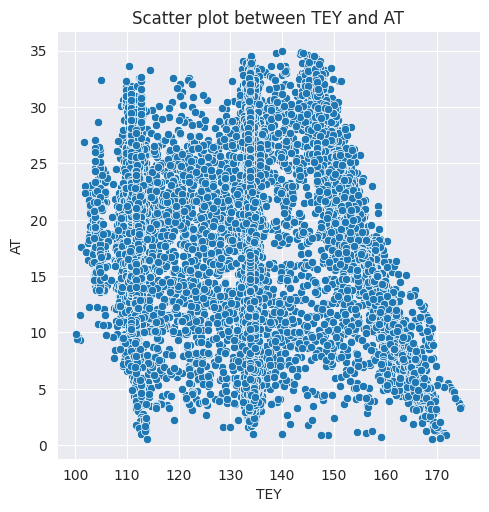

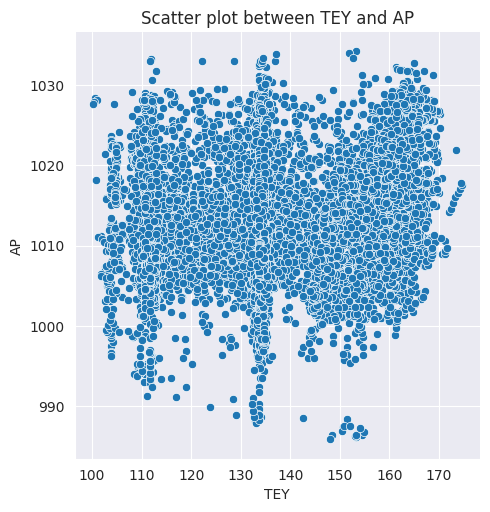

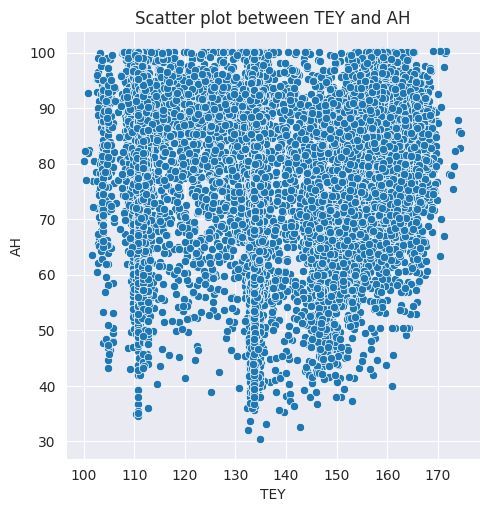

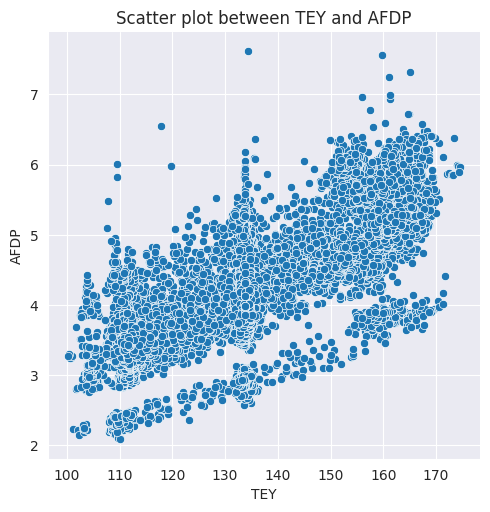

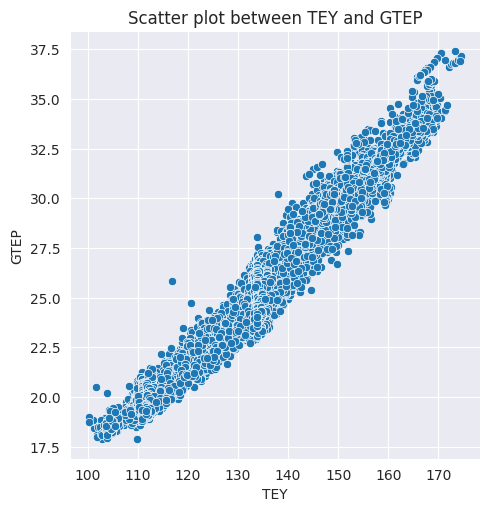

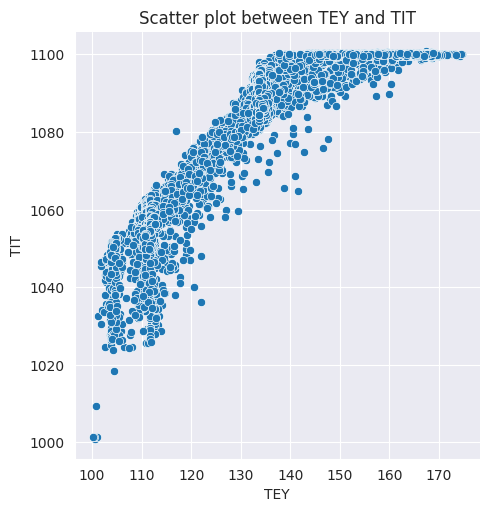

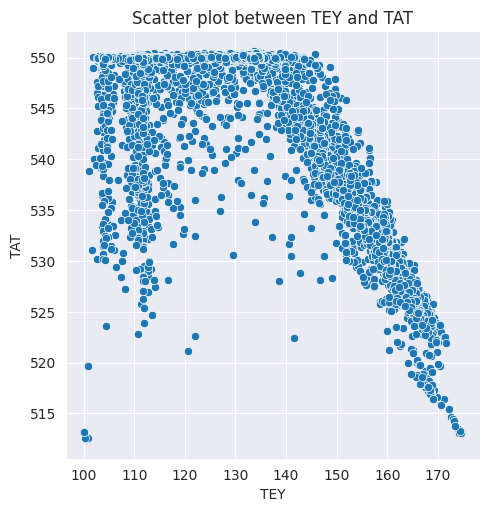

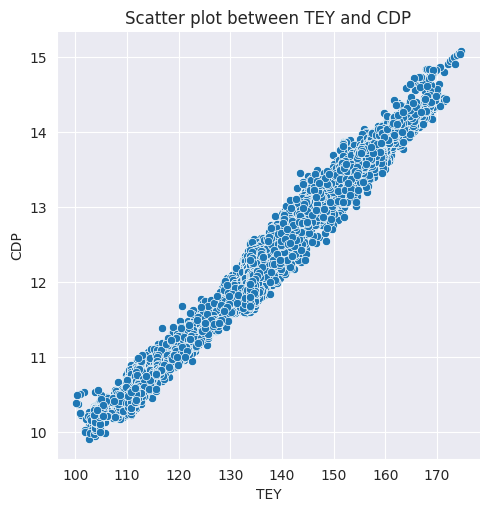

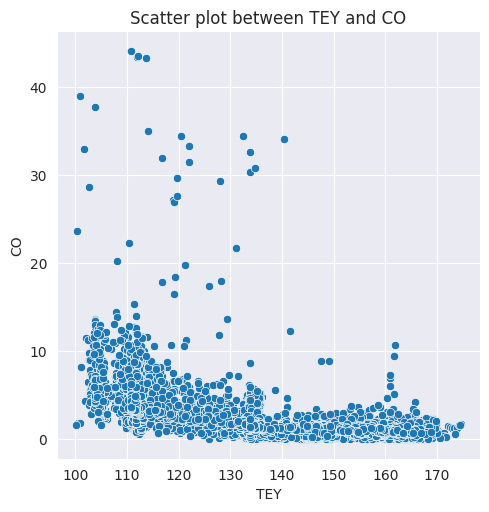

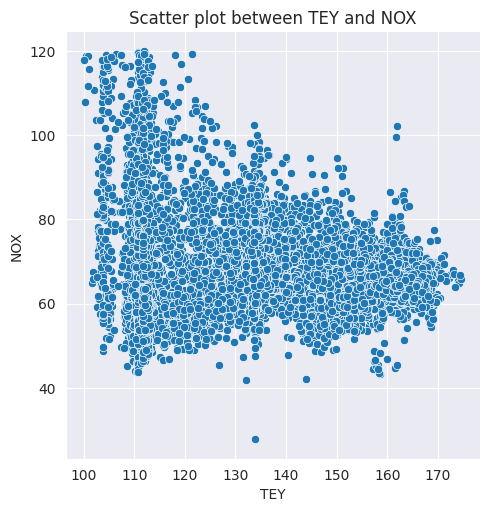

In [ ]:
for i in col:
  if i not in ['TEY']:
    sns.relplot(x=df['TEY'], y=df[i], kind='scatter')
    plt.title(f'Scatter plot between TEY and {i}')
    plt.show()

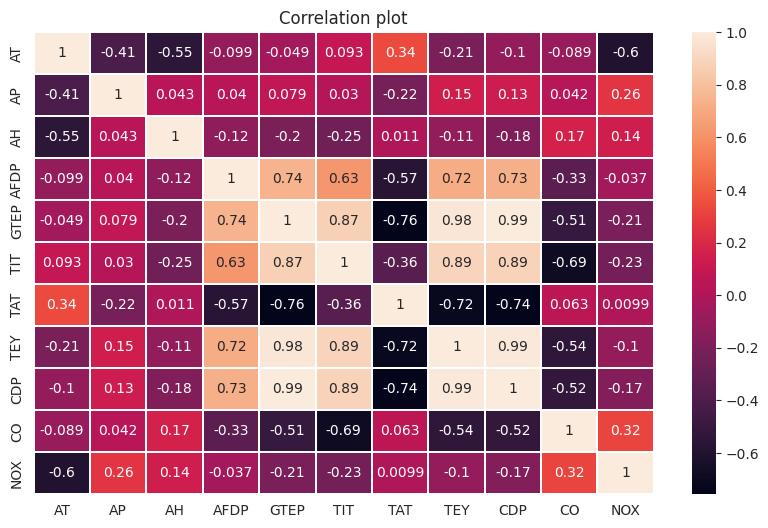

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, linewidth=0.2 )
plt.title('Correlation plot')
plt.show()

* 'TEY' and 'CDP' are highly correlated with correlation coefficient equal to 0.99
* 'TEY' and 'TIT' are highly correlated with correlation coefficient equal to 0.89
* 'TET' and 'GTEP' are highly corelated with correlation coefficient equal to 0.98
* 'TEY' and 'AFDP' also positively correlated with correlation coefficient equal to 0.72

# Let's Scale the data

In [14]:
df_log = df.apply(lambda x: np.log(x))

In [15]:
df_log.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.925620,6.915624,4.572637,1.252763,2.978739,6.965269,6.309918,4.742320,2.361326,1.148893,4.415486
1,1.914714,6.916120,4.575927,1.252706,2.982039,6.965364,6.309918,4.742494,2.360665,1.174431,4.416138
2,1.931188,6.916517,4.563713,1.247722,2.984621,6.965458,6.309682,4.742407,2.360948,1.163526,4.412410
3,1.954006,6.916913,4.556495,1.247176,2.985278,6.965647,6.309900,4.742494,2.361420,1.160742,4.414857
4,2.001183,6.917409,4.555455,1.252077,2.983913,6.965741,6.309882,4.742494,2.361985,1.178163,4.410505


# Split the dataset

In [16]:
X = df_log.drop(columns=['TEY'])
y = df_log['TEY']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 10), (3008, 10), (12031,), (3008,))

# Let's Do Hyperparameter tuning

In [ ]:
import time

In [ ]:
start_time = time.time()
# Define the model
def create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=8, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Use 'linear' for regression

    adam = Adam(learning_rate=learning_rate)  # Update 'lr' to 'learning_rate'
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])  # Use MSE for regression
    return model

# Create the model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
batch_size = [10, 20, 40, 50, 60]
epochs = [10, 50, 200]
learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
neuron1 = [4, 8, 16, 32]
neuron2 = [2, 4, 8, 28]

# Make a dictionary of the grid search parameters
param_grids = dict(batch_size=batch_size, epochs=epochs, learning_rate=learning_rate, dropout_rate=dropout_rate,
                   activation_function=activation_function, init=init, neuron1=neuron1, neuron2=neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grids, cv=KFold(), verbose=10)
grid_result = grid.fit(X, y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))
end_time = time.time()
total_time = end_time-start_time
total_time

# Build the Model

In [18]:
model = Sequential()

In [19]:
model.add(Dense(32, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(28, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, activation='linear'))

adam = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 28)                924       
                                                                 
 dense_2 (Dense)             (None, 1)                 29        
                                                                 
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
### Train the model
history = model.fit(X,y,validation_data=(X_train,y_train), batch_size = 50, epochs = 200 )

Epoch 1/200
301/301 [==============================] - 9s 8ms/step - loss: 0.3591 - mean_absolute_error: 0.2052 - val_loss: 0.0024 - val_mean_absolute_error: 0.0393
Epoch 2/200
301/301 [==============================] - 2s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0295 - val_loss: 6.0835e-04 - val_mean_absolute_error: 0.0184
Epoch 3/200
301/301 [==============================] - 2s 5ms/step - loss: 6.8829e-04 - mean_absolute_error: 0.0205 - val_loss: 7.0456e-04 - val_mean_absolute_error: 0.0222
Epoch 4/200
301/301 [==============================] - 2s 6ms/step - loss: 4.6903e-04 - mean_absolute_error: 0.0171 - val_loss: 2.9687e-04 - val_mean_absolute_error: 0.0132
Epoch 5/200
301/301 [==============================] - 2s 6ms/step - loss: 4.5853e-04 - mean_absolute_error: 0.0171 - val_loss: 2.7223e-04 - val_mean_absolute_error: 0.0126
Epoch 6/200
301/301 [==============================] - 2s 5ms/step - loss: 6.0038e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0013 - val_mean_a

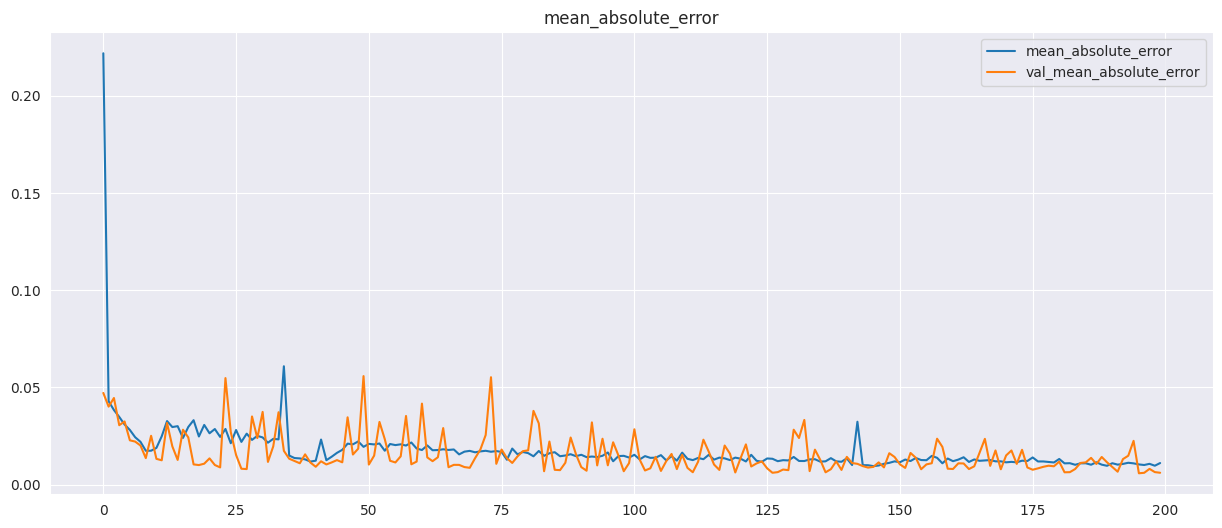

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.legend()
plt.title('mean_absolute_error')
plt.show()

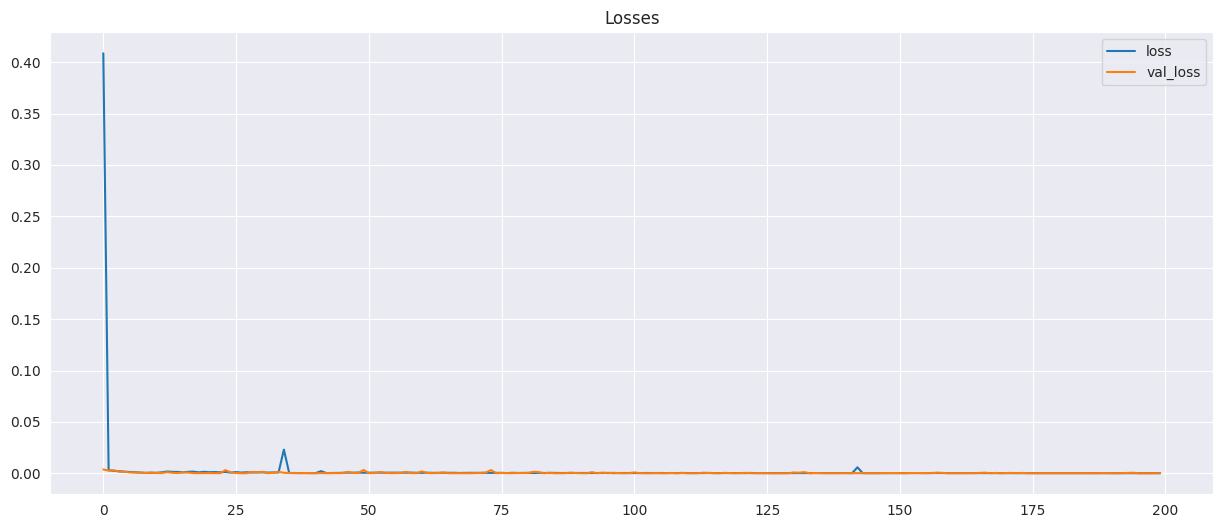

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Losses')
plt.show()

In [22]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

94/94 [==============================] - 0s 3ms/step


In [29]:
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)
print(f'mean_absolute_error for train: {mae_train}')
print(f'mean_absolute_error for test: {mae_test}')

mean_absolute_error for train: 0.007366022925979596
mean_absolute_error for test: 0.0073332151059976956


In [30]:
train_r2_score = r2_score(y_train, train_pred)
test_r2_score = r2_score(y_test, test_pred)
print(f'r2_score for train: {train_r2_score}')
print(f'r2_score for test: {test_r2_score}')

r2_score for train: 0.993865748959709
r2_score for test: 0.9939434850700981


# Conclusion
1. First of all I installed all packages for required in Neural Network.
2. Then I did EDA and found some useful insights from dataset.
* Columns 'NOX', 'AT' and 'AP' are normally distributed and rest of the columns are skewed.
*  'TEY' and 'CDP' are highly correlated with correlation coefficient equal to 0.99
* 'TEY' and 'TIT' are highly correlated with correlation coefficient equal to 0.89
*  'TET' and 'GTEP' are highly corelated with correlation coefficient equal to 0.98
* 'TEY' and 'AFDP' also positively correlated with correlation coefficient equal to 0.72
3. After that I did hyperparameter tuning for finding best hyperparameter for our model.
4. Then I trained the model and found
* mean_absolute_error for test is 0.00733 and for train is 0.00736
* r2_score for test is 0.9939 and for train is 0.9938
